In [1]:
import os

In [2]:
#to get the file path in notebooks
# __file__ path no work in Jupiter note
#https://stackoverflow.com/questions/39125532/file-does-not-exist-in-jupyter-notebook
current_dir=os.path.abspath('')

Load dataset

In [3]:
# download the tiny shakespeare dataset
sufix="16maps_nonalpha"
folder=f"microstate_{sufix}_2sE_dataset_pretokenize"
input_file_path = os.path.join(os.path.dirname(current_dir), f"data/{folder}/output_{sufix}_2sE.train.txt")
print(input_file_path)

/home/rjarpa/code/nanoGPT/data/microstate_16maps_nonalpha_2sE_dataset_pretokenize/output_16maps_nonalpha_2sE.train.txt


In [4]:
# Read the text file and store each line as an element in a list
def read_text_file_to_list(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        lines = [line.strip() for line in lines]
    return lines


In [5]:
# Replace 'file_path.txt' with the actual path to your text file
dataset = read_text_file_to_list(input_file_path)

# Print the list
#print(dataset)

**Load tokenizer**

In [6]:
token_file_path = f"{os.path.dirname(current_dir)}/data/tokenizer-output-{sufix}-2sE.json"

In [7]:
#https://huggingface.co/docs/transformers/fast_tokenizers

from transformers import PreTrainedTokenizerFast
tokenizer = PreTrainedTokenizerFast(tokenizer_file=token_file_path)


/opt/anaconda3/envs/gpt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:


# Tokenize the dataset and count the occurrences
vocab_count = {}
for sentence in dataset:
    encoding = tokenizer.encode(sentence)
    #tokens = encoding.tokens
    for token in encoding:
        vocab_count[token] = vocab_count.get(token, 0) + 1


In [9]:
# Tokenize the dataset and count the occurrences
vocab_count_decoded = {}
for sentence in dataset:
    encoding = tokenizer.encode(sentence)
    #tokens = encoding.tokens
    for token in encoding:
        vocab_count_decoded[tokenizer.decode(token)] = vocab_count_decoded.get(tokenizer.decode(token), 0) + 1


In [10]:
# Optionally, you can sort the vocabulary by count
sorted_vocab_count = {k: v for k, v in sorted(vocab_count.items(), key=lambda item: item[1], reverse=True)}


In [11]:
# Optionally, you can sort the vocabulary by count
sorted_vocab_count_decoded = {k: v for k, v in sorted(vocab_count_decoded.items(), key=lambda item: item[1], reverse=True)}


In [12]:
# Print the result
for token, count in sorted_vocab_count_decoded.items():
    print(f"{token}: {count}")

OO: 2047
DD: 1999
EE: 1994
II: 1981
BB: 1970
FF: 1967
NNNN: 1959
NN: 1950
AA: 1948
KK: 1945
JJ: 1943
GG: 1942
EEEE: 1922
OOOO: 1896
EEEEE: 1889
PP: 1878
MMMM: 1871
LL: 1866
DDDDD: 1863
MM: 1863
NNNNN: 1863
HH: 1855
JJJJJ: 1841
OOOOO: 1829
CC: 1828
GGGGG: 1824
IIII: 1810
DDDD: 1803
LLLLL: 1792
IIIII: 1785
MMMMM: 1761
CCCCC: 1748
DDD: 1707
GGGG: 1703
CCC: 1702
NNNNNN: 1697
KKKKK: 1685
FFFFF: 1683
CCCC: 1679
III: 1667
EEE: 1656
OOO: 1653
HHHHH: 1652
CCCCCC: 1644
GGGGGG: 1635
HHHHHH: 1630
FFFFFF: 1626
JJJJJJ: 1622
AAAAAA: 1622
MMM: 1615
IIIIII: 1613
JJJJ: 1612
KKKKKK: 1606
NNN: 1596
LLLLLL: 1593
AAAAA: 1591
OOOOOO: 1591
PPPPP: 1586
BBBBBB: 1574
MMMMMM: 1568
GGG: 1567
DDDDDD: 1559
EEEEEE: 1511
PPPPPP: 1500
AAAAAAA: 1459
JJJ: 1449
HHHHHHH: 1446
PPPP: 1440
PPP: 1436
LLLLLLL: 1430
EEEEEEE: 1428
GGGGGGG: 1414
PPPPPPP: 1403
MMMMMMM: 1402
FFFFFFF: 1393
NNNNNNN: 1378
KKKKKKK: 1376
BBBBBBB: 1374
OOOOOOO: 1373
DDDDDDD: 1369
CCCCCCC: 1340
JJJJJJJ: 1310
BBBBB: 1304
AAA: 1297
IIIIIII: 1285
BBBBBBBB: 12

In [13]:
# Print the result
for token, count in sorted_vocab_count.items():
    print(f"{token}: {count}")
    

27: 2047
31: 1999
36: 1994
35: 1981
22: 1970
24: 1967
46: 1959
30: 1950
25: 1948
29: 1945
37: 1943
33: 1942
53: 1922
43: 1896
83: 1889
28: 1878
48: 1871
26: 1866
78: 1863
32: 1863
90: 1863
23: 1855
88: 1841
75: 1829
34: 1828
80: 1824
49: 1810
47: 1803
74: 1792
84: 1785
94: 1761
82: 1748
66: 1707
50: 1703
64: 1702
110: 1697
77: 1685
87: 1683
52: 1679
69: 1667
67: 1656
60: 1653
85: 1652
112: 1644
113: 1635
104: 1630
105: 1626
116: 1622
103: 1622
65: 1615
114: 1613
51: 1612
109: 1606
59: 1596
106: 1593
73: 1591
108: 1591
76: 1586
102: 1574
117: 1568
63: 1567
111: 1559
115: 1511
107: 1500
119: 1459
68: 1449
118: 1446
44: 1440
62: 1436
122: 1430
133: 1428
129: 1414
123: 1403
128: 1402
121: 1393
126: 1378
125: 1376
120: 1374
124: 1373
127: 1369
132: 1340
131: 1310
72: 1304
57: 1297
130: 1285
89: 1263
86: 1183
70: 1162
56: 1160
42: 1159
99: 1143
81: 1124
101: 1123
100: 1117
95: 1114
97: 1113
45: 1113
79: 1107
71: 1107
38: 1099
39: 1098
91: 1086
96: 1084
134: 1078
92: 1070
139: 1061
135: 1060


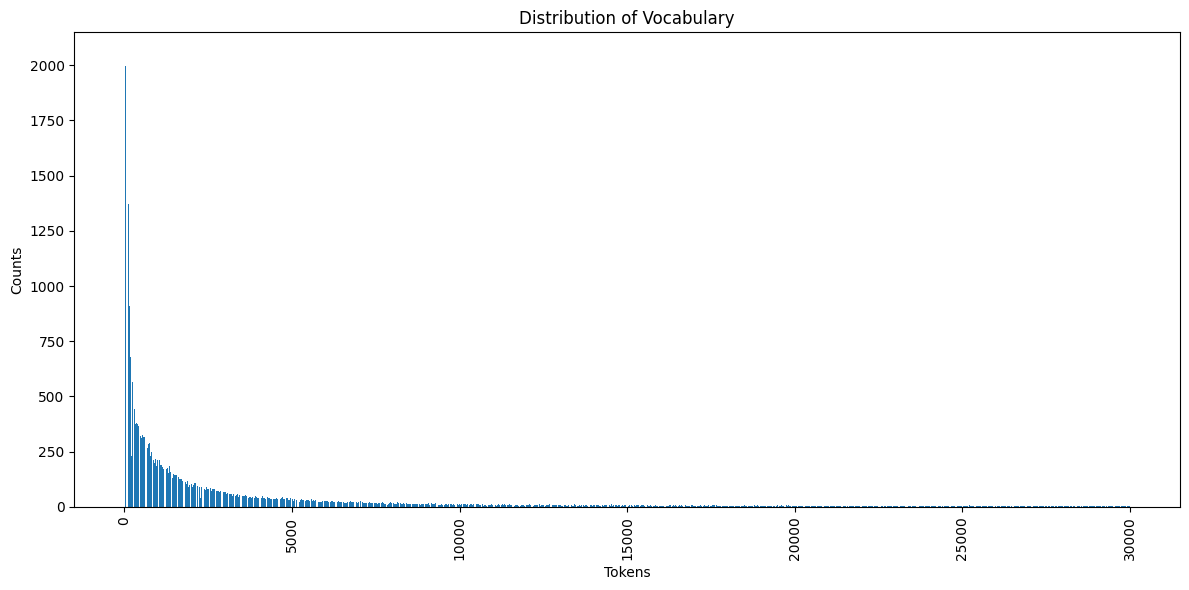

In [14]:
import matplotlib.pyplot as plt

# Your code to calculate sorted_vocab_count goes here...

# Convert the sorted_vocab_count dictionary into two lists: tokens and counts
tokens, counts = zip(*sorted_vocab_count.items())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel("Tokens")
plt.ylabel("Counts")
plt.title("Distribution of Vocabulary")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
# Filter vocab_count to include items with at least 100 occurrences
min_occurrences = 100
filtered_vocab_count = {token: count for token, count in sorted_vocab_count_decoded.items() if count >= min_occurrences}


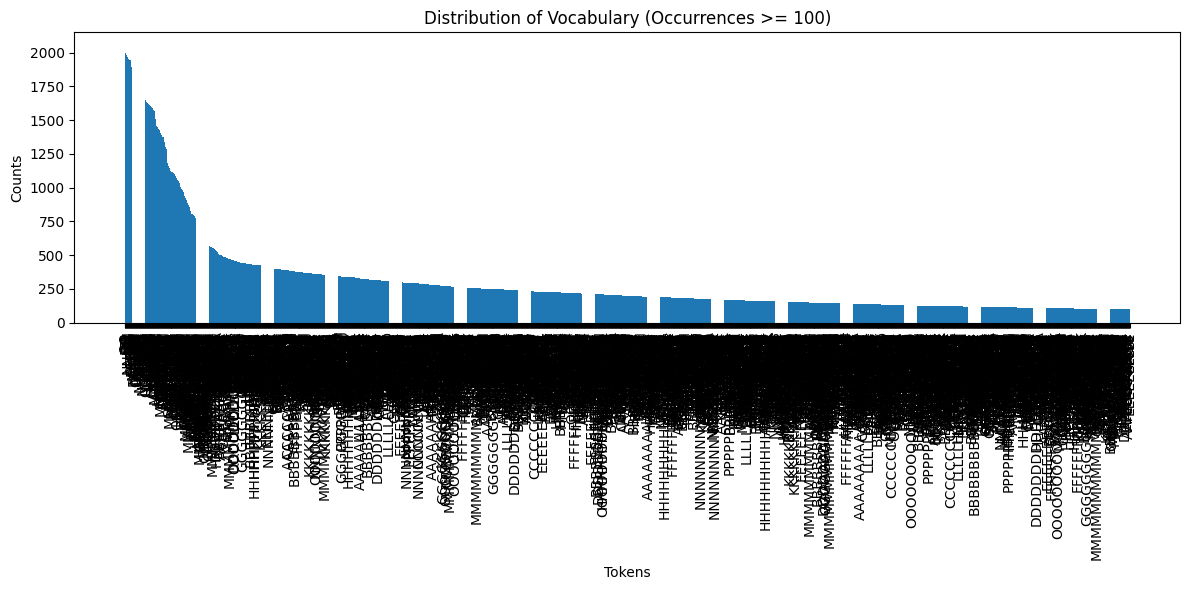

In [16]:
# Convert the filtered_vocab_count dictionary into two lists: tokens and counts
tokens, counts = zip(*filtered_vocab_count.items())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel("Tokens")
plt.ylabel("Counts")
plt.title(f"Distribution of Vocabulary (Occurrences >= {min_occurrences})")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
print(f"filtered_vocab_count: {len(filtered_vocab_count)}")
print(f"vocab_count_decoded: {len(vocab_count_decoded)}")

aprox_words=round(len(filtered_vocab_count)*100/95)
print(f"recommended size vocab: {aprox_words}")

filtered_vocab_count: 2026
vocab_count_decoded: 29523
recommended size vocab: 2133


In [18]:
#whole dataset
#filtered_vocab_count: 3637
#vocab_count_decoded: 29572
#recommended size vocab: 3828